# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane have the lowest average, median, variance, standard deviation, and standard error tumor volumes. These two regimines may be the most effective drugs in reducing tumor volume. However, there are some possible outliers in the data.
- There is an approximately equal distribution of male and female mice in the dataset. Gender may not play a signifiant role in any observed differences between treatment groups.
- There is a relatively strong positive correlation between mouse weight and average tumor volume for the Capomulin regimen (0.84). As the weight of the mice in the study increases, the average tumor volume tends to increase as well.
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Checking the number of mice
num_mice = merged_df['Mouse ID'].nunique()
num_mice

249

In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [49]:
# Get all the data for the duplicate mouse ID
merged_df.loc[(merged_df['Mouse ID'] == 'g989') & (merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_df = merged_df.loc[merged_df['Mouse ID'] != 'g989']
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice in the clean DataFrame
num_mice = cleaned_df['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen (using groupby)
regimen_grouped = cleaned_df.groupby('Drug Regimen')

tv_mean = regimen_grouped['Tumor Volume (mm3)'].mean()
tv_median = regimen_grouped['Tumor Volume (mm3)'].median()
tv_variance = regimen_grouped['Tumor Volume (mm3)'].var()
tv_std = regimen_grouped['Tumor Volume (mm3)'].std()
tv_sem = regimen_grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
                        'Mean Tumor Volume': tv_mean,
                        'Median Tumor Volume': tv_median,
                        'Tumor Volume Variance': tv_variance,
                        'Tumor Volume Std. Dev.': tv_std,
                        'Tumor Volume Std. Err.': tv_sem})

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = regimen_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Count')

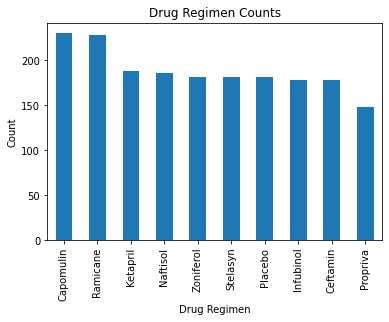

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
bar_plot = cleaned_df['Drug Regimen'].value_counts().plot.bar(width=0.5)
bar_plot.set_title('Drug Regimen Counts')
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Count')

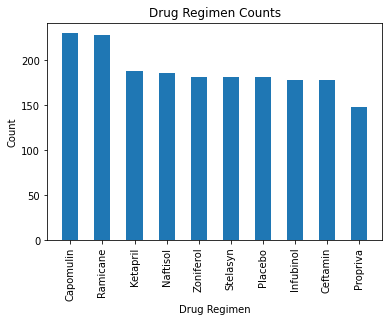

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, width=0.5)

plt.title('Drug Regimen Counts')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


Text(0, 0.5, '')

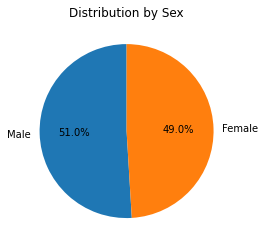

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_df['Sex'].value_counts()
pie_plot = gender_counts.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')
pie_plot.set_ylabel('')


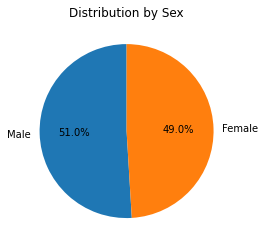

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution by Sex')
ax.set_ylabel('')
plt.show()


## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_df = cleaned_df[cleaned_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = regimen_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(regimen_df, last_timepoint, on=['Mouse ID', 'Timepoint'])
final_tumor_vol.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes, add subset, determine outliers using upper and lower bounds
for treatment in treatments:
    treatment_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == treatment]
    tumor_vol = treatment_df['Tumor Volume (mm3)']
    tumor_volumes.append(tumor_vol)

    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_df.loc[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | 
                                (treatment_df['Tumor Volume (mm3)'] > upper_bound)]

    print(f"Outliers({treatment}): {outliers['Tumor Volume (mm3)'].tolist()}")
    

Outliers(Capomulin): [25.47214326, 23.34359787]
Outliers(Ramicane): [22.05012627]
Outliers(Infubinol): []
Outliers(Ceftamin): []


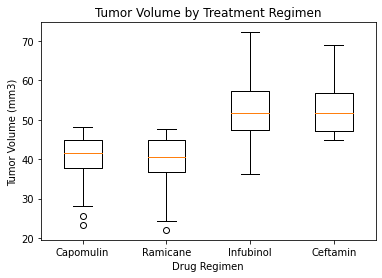

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, labels=treatments)
ax.set_title('Tumor Volume by Treatment Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


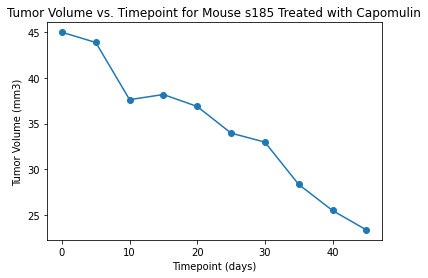

In [62]:
capomulin_mouse = capomulin_df[capomulin_df['Mouse ID'] == 's185']
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint for Mouse s185 Treated with Capomulin')
plt.show()

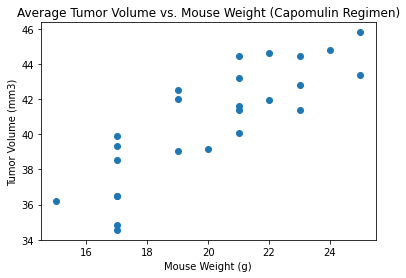

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_ave = capomulin_df.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]

plt.scatter(capomulin_ave['Weight (g)'], capomulin_ave['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


Text(0, 0.5, 'Tumor Volume (mm3)')

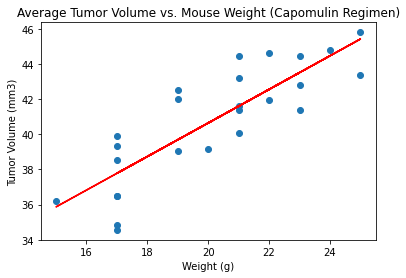

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_ave['Weight (g)'], capomulin_ave['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {correlation:.2f}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_ave['Weight (g)'], capomulin_ave['Tumor Volume (mm3)'])
plt.scatter(capomulin_ave['Weight (g)'], capomulin_ave['Tumor Volume (mm3)'])
regress_values = capomulin_ave['Weight (g)'] * slope + intercept
plt.plot(capomulin_ave['Weight (g)'], regress_values, color='red')
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")